In [ ]:
# you may need to install networkx with pip
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import networkx as nx
import colorsys


### Decision Trees

In [82]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
display(df)
display(df.columns)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

<Axes: xlabel='Calories_Burned', ylabel='Count'>

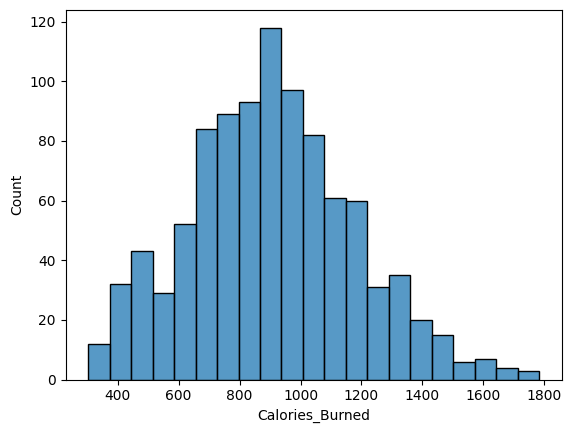

In [83]:
# show distribution of calories burned
sns.histplot(df['Calories_Burned'])

In [84]:

df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [85]:
display(df['Workout_Type'].unique())

df = pd.get_dummies(df, columns=['Workout_Type'])

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [86]:
def labelCalories(amount):
    if 0 <= amount < 500:
        return "Small"
    elif 500 <= amount < 1200:
        return "Medium"
    else:
        return "Large"

In [87]:
df['Calories'] = df['Calories_Burned'].apply(labelCalories)

# standerdize the data
# scaler = StandardScaler()
# scaler.fit(df.drop('Calories', axis=1))

# scaled_features = scaler.transform(df.drop('Calories', axis=1))
# scaled_features_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])

# scaled_features_df.drop(['Calories_Burned'], axis=1, inplace=True)

# display(scaled_features_df)

Session_Duration (hours)         0.908140
Experience_Level                 0.694129
Fat_Percentage                   0.597615
Workout_Frequency (days/week)    0.576150
Water_Intake (liters)            0.356931
Avg_BPM                          0.339659
Age                              0.154679
Gender                           0.150646
Weight (kg)                      0.095443
Height (m)                       0.086348
BMI                              0.059761
Workout_Type_Cardio              0.045726
Workout_Type_HIIT                0.040550
Resting_BPM                      0.016518
Workout_Type_Strength            0.011629
Workout_Type_Yoga                0.004678
Max_BPM                          0.002090
Name: Calories_Burned, dtype: float64

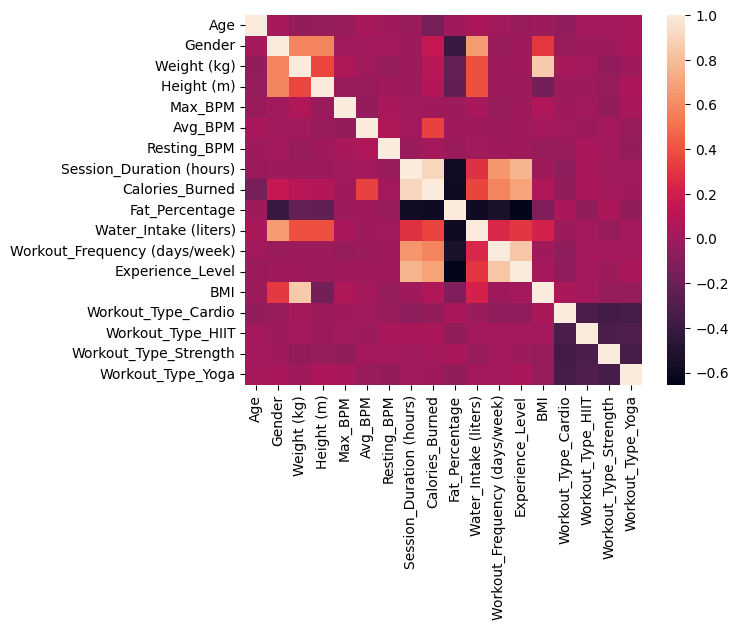

In [88]:
cols = df.columns.tolist()
cols.remove('Calories')

corr = df[cols].corr(min_periods=15) #  'Max_BPM',  'Experience_Level', 
sns.heatmap(corr)
# create a sorted list of columns based on absolute value correlation with calories
corr = corr['Calories_Burned'].apply(abs).sort_values(ascending=False)

corr.drop('Calories_Burned', inplace=True)

display(corr)

In [89]:
# split data into x and y
df.drop('Calories_Burned', axis=1, inplace=True)
X = df.drop(['Calories'], axis=1)
y = df['Calories']

In [90]:
# train desiscion tree and visulize it

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

def test_dTree(depth, features_num, tests, print_report=False):

    total_predictions = []
    total_y_test = []

    for i in range(tests):

        dtree = DecisionTreeClassifier(max_depth=depth)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        X_train = X_train[corr[:features_num].index]
        X_test = X_test[X_train.columns]

        dtree.fit(X_train, y_train)

        predictions = dtree.predict(X_test)

        total_predictions.extend(predictions)
        total_y_test.extend(y_test)

    report = classification_report(total_y_test, total_predictions, output_dict=True, zero_division=0)

    if print_report:
        print(classification_report(total_y_test, total_predictions))

    return report


def plot_tree(dtree, features):
    fig = plt.figure(figsize=(25,20))

    _ = tree.plot_tree(dtree,
                        feature_names=features,
                        class_names=['Small', 'Medium', 'Large'],
                        filled=True)

    # fig.savefig("decision_tree.png")

    plt.show()

In [91]:
tests = 1 # changed from 100 so its will run faster

max_depth = 17
max_features = len(X.columns)

f1_scores = np.zeros((max_depth, max_features))

for i in range(max_depth):
    for j in range(max_features):
        depth = i + 1
        feature_num = j + 1

        report = test_dTree(depth, feature_num, tests)

        print(f"Depth: {depth}, Features: {feature_num}: {report['weighted avg']['f1-score']}")

        f1_scores[i][j] = report['weighted avg']['f1-score']


plt.show()

Depth: 1, Features: 1: 0.78466982416027
Depth: 1, Features: 2: 0.7926344086021505
Depth: 1, Features: 3: 0.7448107448107448
Depth: 1, Features: 4: 0.8182905982905982
Depth: 1, Features: 5: 0.730405409915954
Depth: 1, Features: 6: 0.6909910166291965
Depth: 1, Features: 7: 0.7448141025641026
Depth: 1, Features: 8: 0.7648747938221623
Depth: 1, Features: 9: 0.8209835253313513
Depth: 1, Features: 10: 0.7971405398372903
Depth: 1, Features: 11: 0.7457342862130915
Depth: 1, Features: 12: 0.7877502570976126
Depth: 1, Features: 13: 0.7696500712577883
Depth: 1, Features: 14: 0.7934446796832118
Depth: 1, Features: 15: 0.8052840181015509
Depth: 1, Features: 16: 0.7756213017751479
Depth: 1, Features: 17: 0.8097304404996714
Depth: 2, Features: 1: 0.8984850686874978
Depth: 2, Features: 2: 0.8904680176454369
Depth: 2, Features: 3: 0.8861116107384732
Depth: 2, Features: 4: 0.8729648064134682
Depth: 2, Features: 5: 0.8395941887749235
Depth: 2, Features: 6: 0.8945396071426271
Depth: 2, Features: 7: 0.9096

Text(0.5, 1.0, 'F1 Score for Decision Tree on test data')

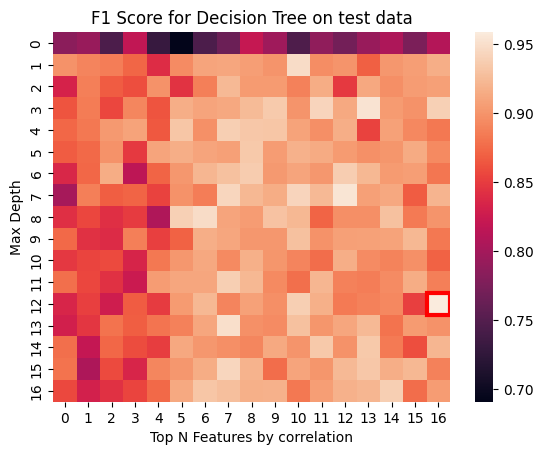

In [92]:
sns.heatmap(f1_scores, fmt=".1f",)

best_score = np.max(f1_scores)
best_score_index = np.where(f1_scores == best_score)



plt.gca().add_patch(plt.Rectangle((best_score_index[1][0], best_score_index[0][0]), 1, 1, fill=False, edgecolor='red', lw=3))


plt.xlabel('Top N Features by correlation')
plt.ylabel('Max Depth')
plt.title('F1 Score for Decision Tree on test data')

#save

# plt.savefig("f1_score_heatmap.png")

Text(0.5, 1.0, 'F1 Score with bias for Decision Tree on test data')

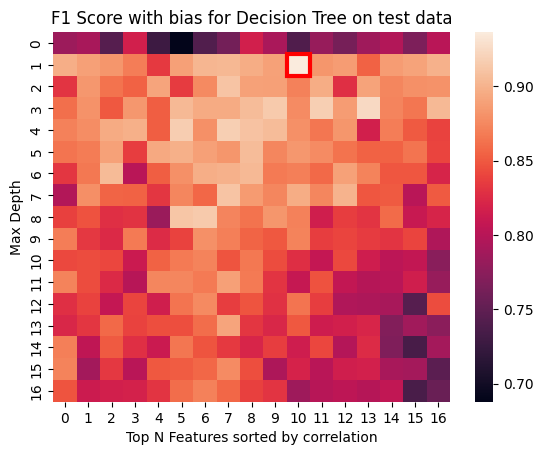

In [93]:
# bias the f1 scores withe a combination of teh niumber of features and the depth then plot again

f1_scores_bias = np.zeros((max_depth, max_features))

for i in range(max_depth):
    for j in range(max_features):
        depth = i + 1
        feature_num = j + 1

        f1_scores_bias[i][j] = f1_scores[i][j] - .15*((feature_num/max_features)*(depth/max_depth))

sns.heatmap(f1_scores_bias, fmt=".1f",)

best_score_b = np.max(f1_scores_bias)
best_score_index_b = np.where(f1_scores_bias == best_score_b)



plt.gca().add_patch(plt.Rectangle((best_score_index_b[1][0], best_score_index_b[0][0]), 1, 1, fill=False, edgecolor='red', lw=3))


plt.xlabel('Top N Features sorted by correlation')
plt.ylabel('Max Depth')
plt.title('F1 Score with bias for Decision Tree on test data')

#save

# plt.savefig("f1_score_heatmap_bias.png")

In [94]:
print(f"Best F1 Score: {best_score}, Depth: {best_score_index[0][0] + 1}, Features: {best_score_index[1][0] + 1}")
print(f"Best F1 Score with bias: {best_score_b}, Depth: {best_score_index_b[0][0] + 1}, Features: {best_score_index_b[1][0] + 1}")

print(f"unbiased f1 score: {f1_scores[best_score_index_b[0][0]][best_score_index_b[1][0]]}")

Best F1 Score: 0.9587944219523166, Depth: 13, Features: 17
Best F1 Score with bias: 0.9364871044136415, Depth: 2, Features: 11
unbiased f1 score: 0.9479057895347487


              precision    recall  f1-score   support

       Large       0.81      0.66      0.73      2696
      Medium       0.93      0.95      0.94     15163
       Small       0.78      0.88      0.82      1641

    accuracy                           0.90     19500
   macro avg       0.84      0.83      0.83     19500
weighted avg       0.90      0.90      0.90     19500



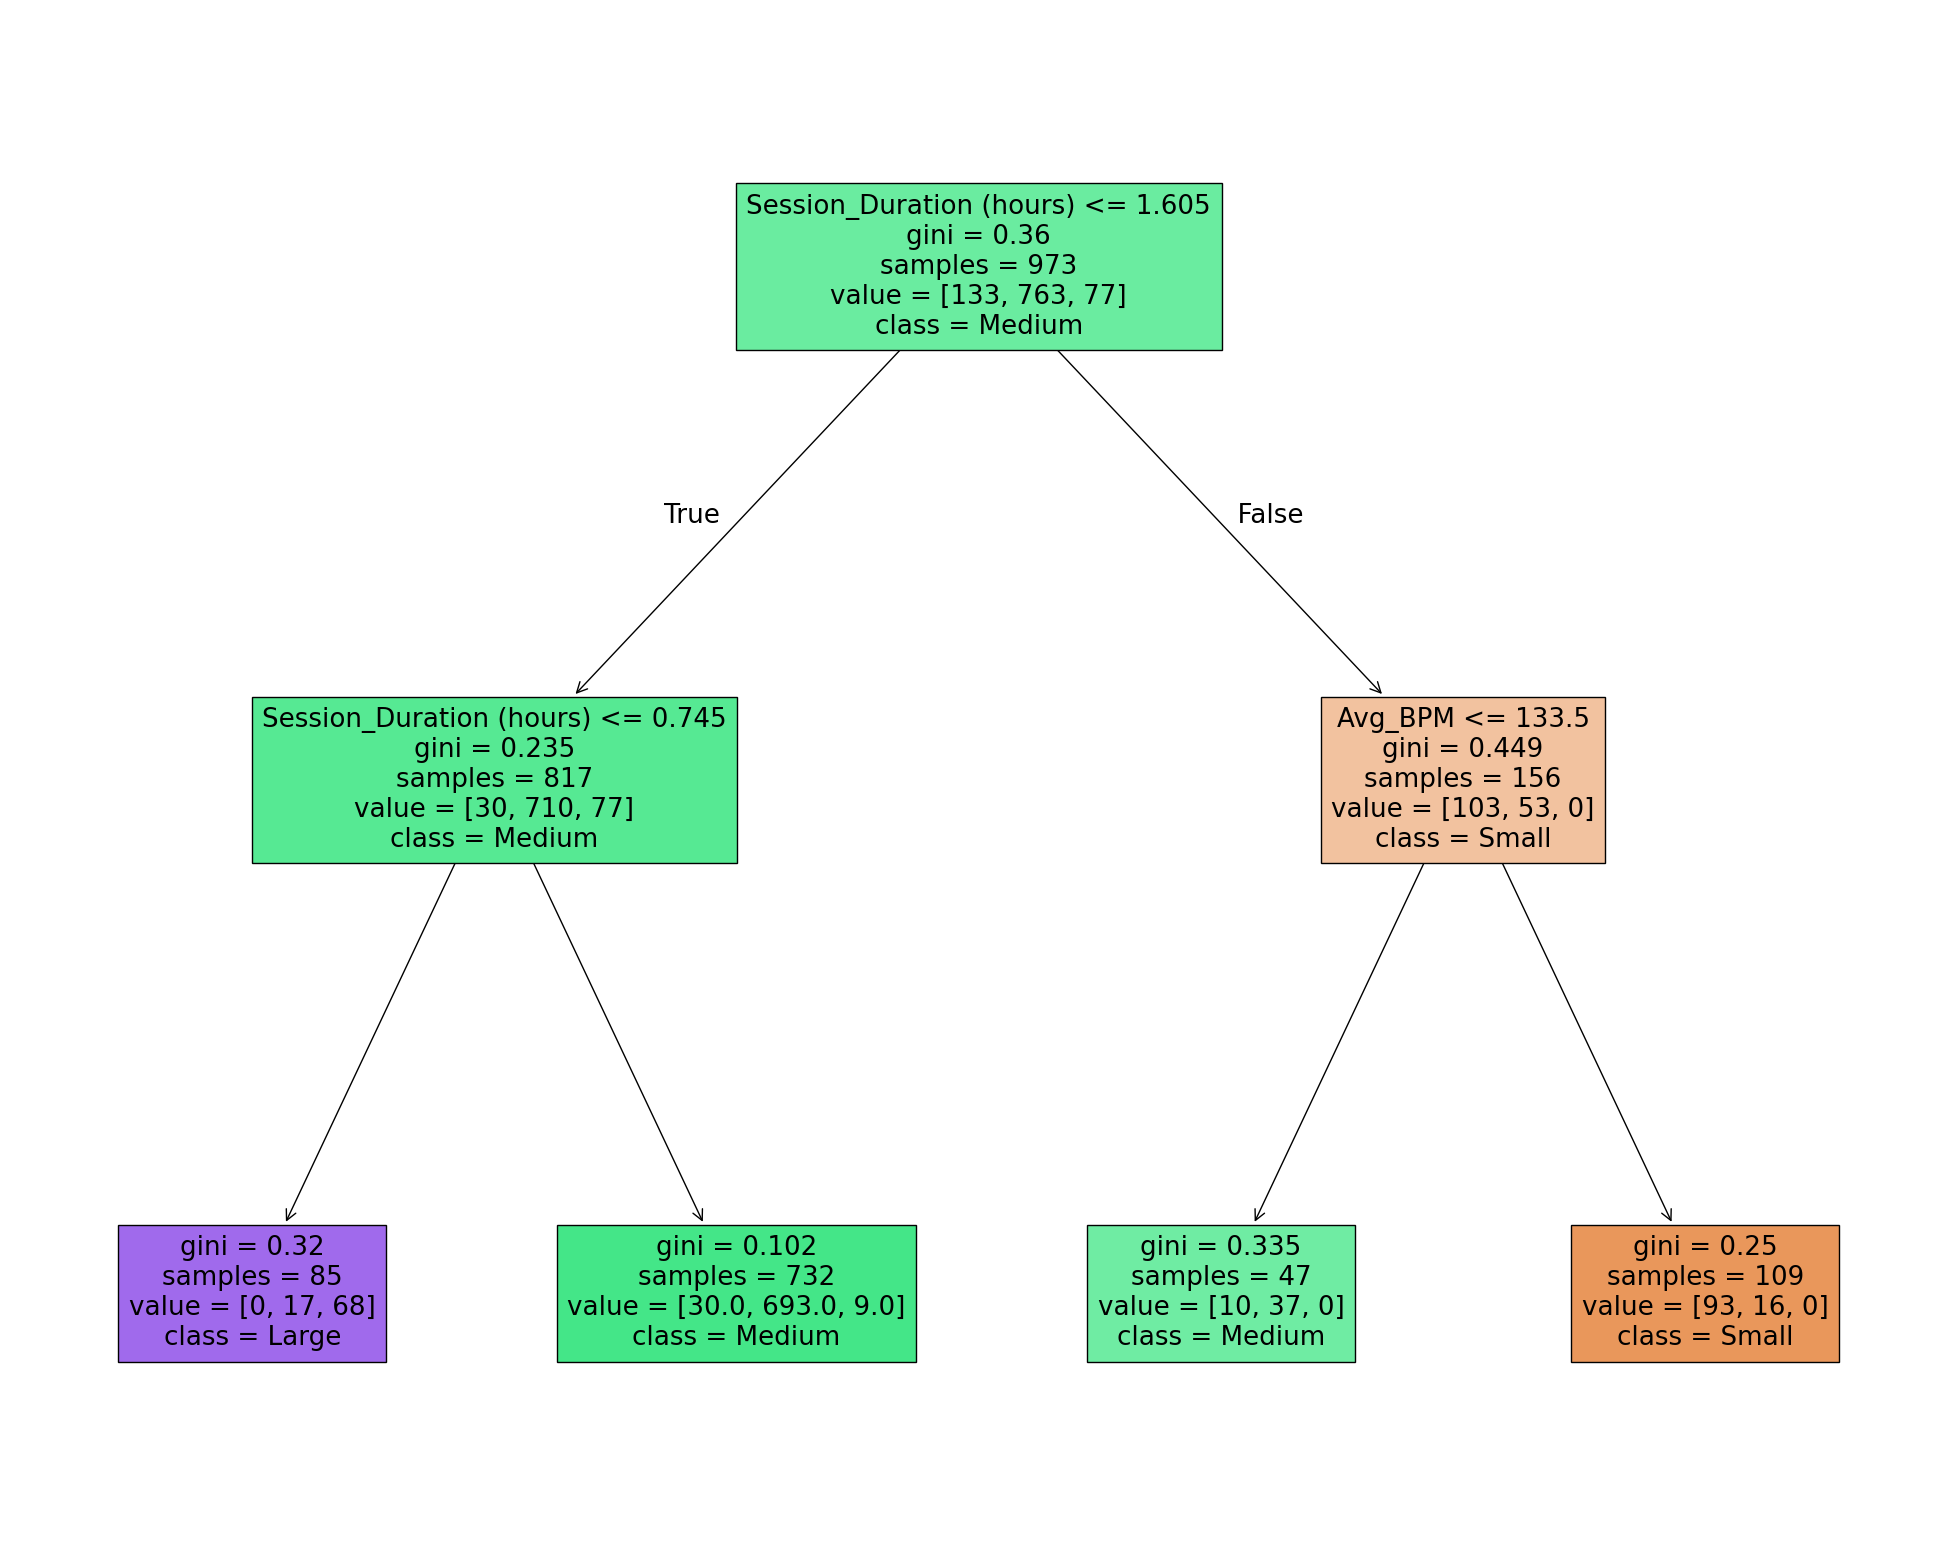

In [95]:
# create tree with best depth and features

test_dTree(best_score_index_b[0][0] + 1, best_score_index_b[1][0] + 1, 100, True)

dtree = DecisionTreeClassifier(max_depth=best_score_index_b[0][0] + 1)

dtree.fit(X, y)

plot_tree(dtree, X.columns)

### Neural Networks

In [96]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
display(df)
display(df.columns)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [97]:
def labelCalories(amount):
    if 0 <= amount < 500:
        return "Small"
    elif 500 <= amount < 1200:
        return "Medium"
    else:
        return "Large"

In [98]:
df['Calories'] = df['Calories_Burned'].apply(labelCalories)
display(df)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Calories
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,Large
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,Medium
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,Medium
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,Medium
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77,Large
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69,Large
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50,Medium
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74,Medium


### Age, Fat_Percentage, Height (m), 'Weight (kg)

C:\Users\layto\AppData\Local\Temp\ipykernel_14004\1452640092.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[['Age', 'Gender', 'Weight (kg)', 'Height (m)','Avg_BPM',


<Axes: >

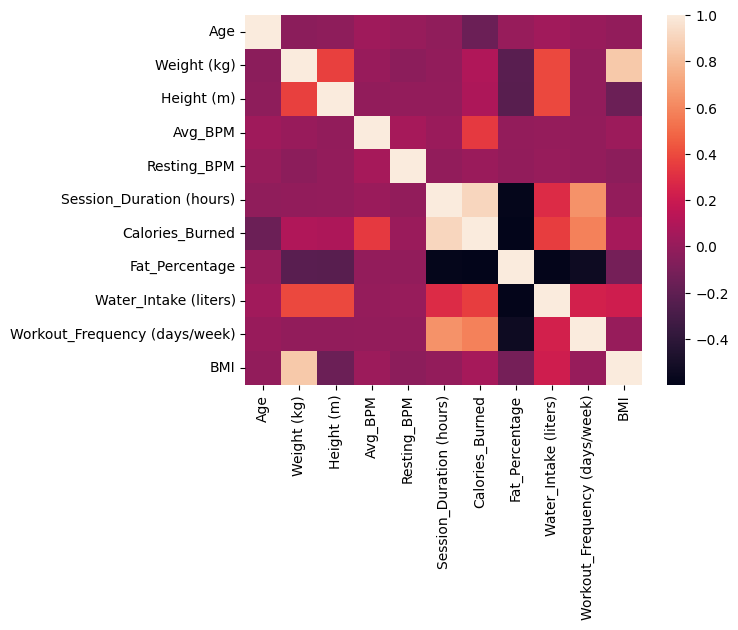

In [99]:
corr = df[['Age', 'Gender', 'Weight (kg)', 'Height (m)','Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)','BMI', 'Calories']].corr(min_periods=15) #  'Max_BPM',  'Experience_Level', 
sns.heatmap(corr)

In [100]:
# Session_Duration (hours), Experience_Level, Fat_Percentage, Workout_Frequency (days/week), Water_Intake (liters), Avg_BPM
X = df.drop(['Gender', 'Weight (kg)', 'Height (m)','Avg_BPM',
       'Resting_BPM', 'Calories_Burned',
       'Workout_Type','BMI', 'Calories'],axis=1)
y = df['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [101]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 0.02340481, -1.12403087, -0.2505005 , ..., -0.22703978,
        -1.40853159, -1.0680726 ],
       [-0.78907642,  0.95659166, -1.69677953, ..., -0.06251493,
        -0.32766893, -1.0680726 ],
       [ 0.51089354, -0.95064566, -0.3095323 , ..., -1.21418886,
         0.75319373,  0.27902935],
       ...,
       [ 1.16087852, -0.08371961, -0.07340511, ...,  1.74725839,
        -0.32766893,  0.27902935],
       [ 1.64836726, -1.03733827, -0.04388921, ...,  0.43105961,
        -0.32766893, -1.0680726 ],
       [-0.95157266,  0.002973  , -0.36856409, ..., -0.55608947,
        -1.40853159, -1.0680726 ]])

In [102]:
def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    


In [103]:
def makeNetwork(hiddenLayer):
    # mlp = MLPClassifier(hidden_layer_sizes=(5),max_iter=500)
    mlp = MLPClassifier(hidden_layer_sizes=hiddenLayer,max_iter=50000)
    mlp.fit(X_train,y_train)
    predictions = mlp.predict(X_test)
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test,predictions))
    print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
    print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp.coefs_)))
    print('The layers have the following number of coefficients: {}')
    for l in range(len(mlp.coefs_)):
        m = len(mlp.coefs_[l])
        n = len(mlp.coefs_[l][0])
        print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
    # Print the actual coefficients
    # print(mlp.coefs_)

    print()
    print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp.intercepts_)))
    print('Each layer has {} intercepts, one for each node'.format([len(mlp.intercepts_[l]) for l,_ in enumerate(mlp.intercepts_)]))
    show_ann(mlp)

[[ 19   6   2]
 [ 19 171   7]
 [  0   2  18]]
              precision    recall  f1-score   support

       Large       0.50      0.70      0.58        27
      Medium       0.96      0.87      0.91       197
       Small       0.67      0.90      0.77        20

    accuracy                           0.85       244
   macro avg       0.71      0.82      0.75       244
weighted avg       0.88      0.85      0.86       244

This dataset has 7 input nodes and 3 output node(s)
There are 6 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 7x13 (7 nodes feeding into a layer of 13 nodes)
  1: 13x13 (13 nodes feeding into a layer of 13 nodes)
  2: 13x2 (13 nodes feeding into a layer of 2 nodes)
  3: 2x14 (2 nodes feeding into a layer of 14 nodes)
  4: 14x11 (14 nodes feeding into a layer of 11 nodes)
  5: 11x3 (11 nodes feeding into a layer of 3 nodes)

There are 6 1D arrays of intercepts, one for each layer
Each layer has [13, 13, 2, 

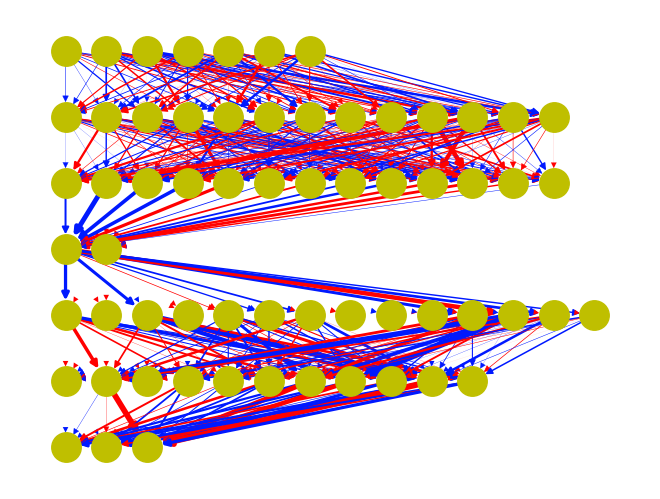

In [104]:
makeNetwork((13, 13, 2, 14, 11))

[[ 18   9   0]
 [ 16 177   4]
 [  0   2  18]]
              precision    recall  f1-score   support

       Large       0.53      0.67      0.59        27
      Medium       0.94      0.90      0.92       197
       Small       0.82      0.90      0.86        20

    accuracy                           0.87       244
   macro avg       0.76      0.82      0.79       244
weighted avg       0.89      0.87      0.88       244

This dataset has 7 input nodes and 3 output node(s)
There are 5 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 7x13 (7 nodes feeding into a layer of 13 nodes)
  1: 13x13 (13 nodes feeding into a layer of 13 nodes)
  2: 13x14 (13 nodes feeding into a layer of 14 nodes)
  3: 14x11 (14 nodes feeding into a layer of 11 nodes)
  4: 11x3 (11 nodes feeding into a layer of 3 nodes)

There are 5 1D arrays of intercepts, one for each layer
Each layer has [13, 13, 14, 11, 3] intercepts, one for each node


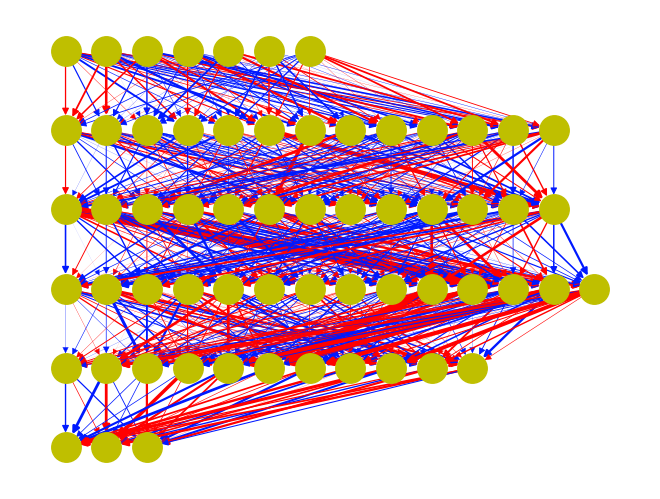

In [105]:
makeNetwork((13, 13,14, 11))

[[ 18   9   0]
 [ 20 172   5]
 [  0   2  18]]
              precision    recall  f1-score   support

       Large       0.47      0.67      0.55        27
      Medium       0.94      0.87      0.91       197
       Small       0.78      0.90      0.84        20

    accuracy                           0.85       244
   macro avg       0.73      0.81      0.77       244
weighted avg       0.88      0.85      0.86       244

This dataset has 7 input nodes and 3 output node(s)
There are 4 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 7x13 (7 nodes feeding into a layer of 13 nodes)
  1: 13x14 (13 nodes feeding into a layer of 14 nodes)
  2: 14x11 (14 nodes feeding into a layer of 11 nodes)
  3: 11x3 (11 nodes feeding into a layer of 3 nodes)

There are 4 1D arrays of intercepts, one for each layer
Each layer has [13, 14, 11, 3] intercepts, one for each node


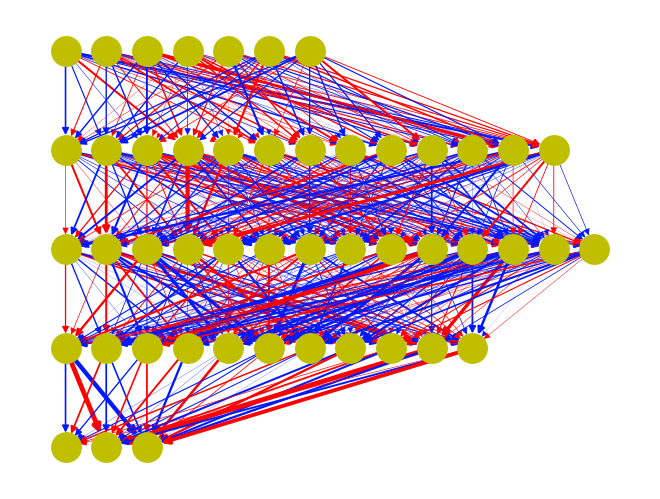

In [106]:
makeNetwork((13, 14, 11))

[[ 18   9   0]
 [ 16 178   3]
 [  0   1  19]]
              precision    recall  f1-score   support

       Large       0.53      0.67      0.59        27
      Medium       0.95      0.90      0.92       197
       Small       0.86      0.95      0.90        20

    accuracy                           0.88       244
   macro avg       0.78      0.84      0.81       244
weighted avg       0.89      0.88      0.89       244

This dataset has 7 input nodes and 3 output node(s)
There are 3 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 7x13 (7 nodes feeding into a layer of 13 nodes)
  1: 13x11 (13 nodes feeding into a layer of 11 nodes)
  2: 11x3 (11 nodes feeding into a layer of 3 nodes)

There are 3 1D arrays of intercepts, one for each layer
Each layer has [13, 11, 3] intercepts, one for each node


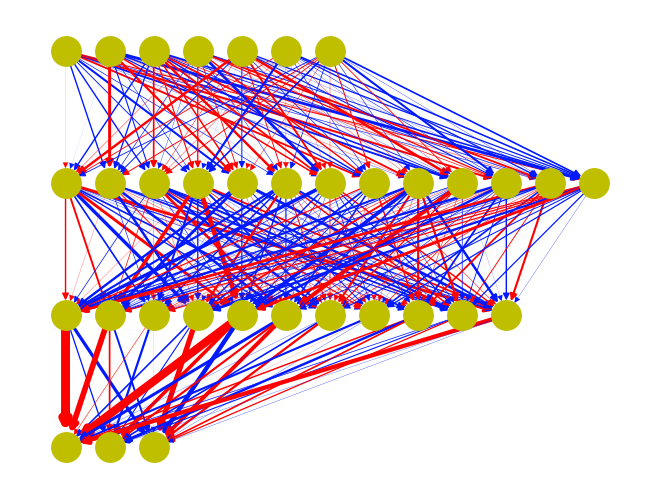

In [107]:
makeNetwork((13, 11))

[[ 18   9   0]
 [ 16 178   3]
 [  0   0  20]]
              precision    recall  f1-score   support

       Large       0.53      0.67      0.59        27
      Medium       0.95      0.90      0.93       197
       Small       0.87      1.00      0.93        20

    accuracy                           0.89       244
   macro avg       0.78      0.86      0.82       244
weighted avg       0.90      0.89      0.89       244

This dataset has 7 input nodes and 3 output node(s)
There are 3 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 7x17 (7 nodes feeding into a layer of 17 nodes)
  1: 17x14 (17 nodes feeding into a layer of 14 nodes)
  2: 14x3 (14 nodes feeding into a layer of 3 nodes)

There are 3 1D arrays of intercepts, one for each layer
Each layer has [17, 14, 3] intercepts, one for each node


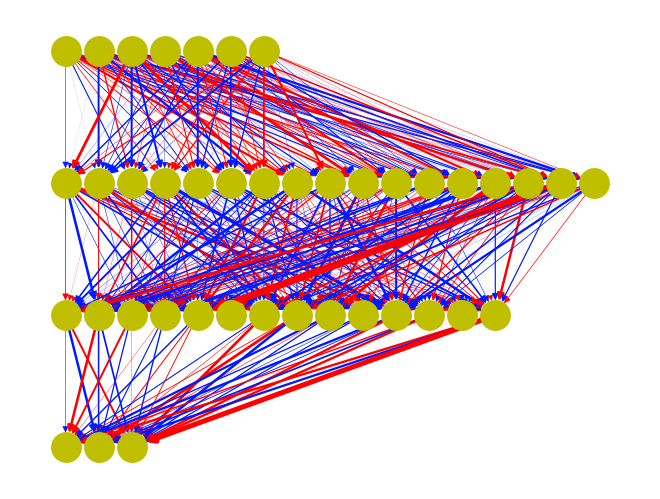

In [108]:
makeNetwork((17, 14))

[[ 18   9   0]
 [ 18 176   3]
 [  0   0  20]]
              precision    recall  f1-score   support

       Large       0.50      0.67      0.57        27
      Medium       0.95      0.89      0.92       197
       Small       0.87      1.00      0.93        20

    accuracy                           0.88       244
   macro avg       0.77      0.85      0.81       244
weighted avg       0.89      0.88      0.88       244

This dataset has 7 input nodes and 3 output node(s)
There are 3 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 7x9 (7 nodes feeding into a layer of 9 nodes)
  1: 9x9 (9 nodes feeding into a layer of 9 nodes)
  2: 9x3 (9 nodes feeding into a layer of 3 nodes)

There are 3 1D arrays of intercepts, one for each layer
Each layer has [9, 9, 3] intercepts, one for each node


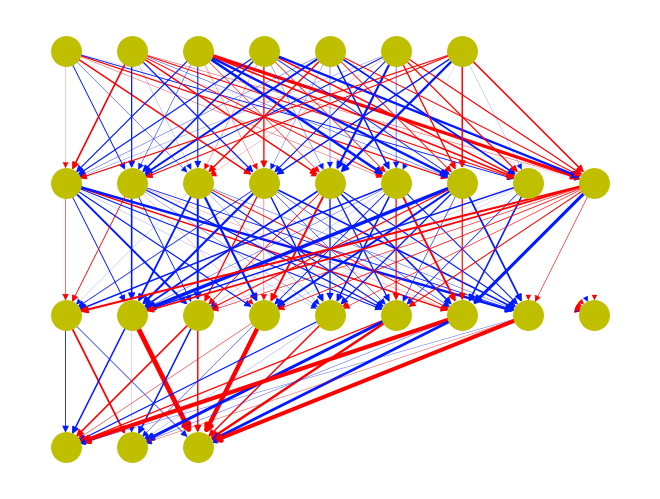

In [113]:
makeNetwork((9, 9))